<a href="https://colab.research.google.com/github/nagusubra/ENDG511_Labs/blob/main/Lab1/ENDG511_LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENDG 511 - Lab 1: Introduction to Deep Neural Networks using TensorFlow**

This colab notebook provides code and a framework for ***Lab 1***. You can work out your solutions here. The example in this lab was inspired by https://www.tensorflow.org/tutorials/quickstart/beginner, with some modifications and additions.


## Goals

In this lab, you will be introduced to the baiscs of TensorFlow and Keras, and you will learn how to use them to create deep learning models. The goals of this lab are:

- Understand the basic workflow for creating models in TensorFlow.
- Understand how to train TensorFlow models.
- Evaluate models in terms of accuracy, size and inference time.
- Understand how different model parameters can impact accuracy, size and inference time

## Layout
This lab is split into **two** parts. 
- **Part 1**: Run through the full example to gain familiarity with TensorFlow. And complete the exercises.
- **Part 2**: Convlutional Neural Netowrks Using TensorFlow. And complete the exercises.

# **Part 1**: Neural Network Machine Learning Model Using TensorFlow

This part of the lab demonstrates building and training a Neural Network to classify MNIST images. This tutorial uses TensorFlow and it is meant to give you a better understanding of how to build, train and evaluate machine learning models using TensorFlow.

### Import TensorFlow and Other Required Modules

In [83]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time
import tempfile

### Download and prepare the MNIST dataset

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9


In [84]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


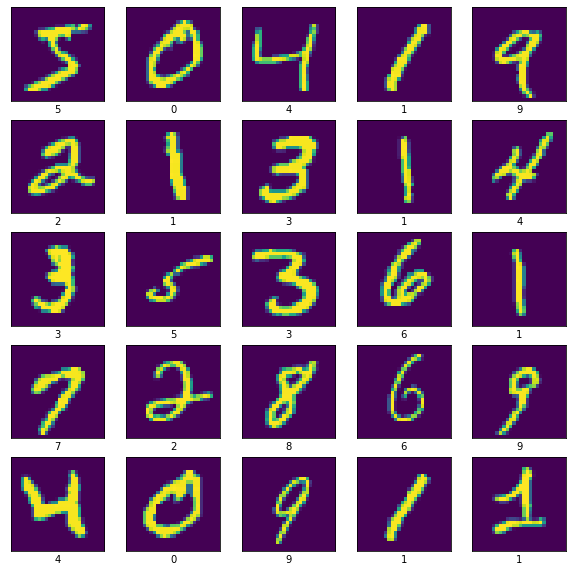

In [85]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build Machine Learning Model

***Sequential*** is useful for stacking layers where each layer has one input tensor and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the Flatten, Dense, and Dropout layers.

In [86]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

Let's display the architecture of our model:

In [87]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 dense_77 (Dense)            (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_78 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Save and Load Model
Let us save and load the model before training. This allows us to save the randomized weights and biases and make more accurate comparisons. We will use the saved model in the exercise section.

In [88]:
# Save your model
model.save('part1_model.h5')

# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('part1_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 dense_77 (Dense)            (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_78 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Compile and train the model

When compiling a model, an optimizer, a loss function and metrics need to be defined. 

- Optimizer: The Adam optimizer is the most popular optimizer and generally works well for classification and regression problems. It is based of gradient descent algorithms.
- Loss Function: The loss function is the function that computes the distance between the current output of the algorithm and the expected output. These functions need to be chosen depending on the application, the SparseCategoricalCrossentropy for example computes the crossentropy loss between the labels and predictions.
- Metrics: A metric is a function that is used to judge the performance of your model. This could be accuracy, mean squared error, cosine similarity or whatever metric works best for your use case.

In [89]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2877 - accuracy: 0.9162 - val_loss: 0.1338 - val_accuracy: 0.9592
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1390 - accuracy: 0.9580 - val_loss: 0.0970 - val_accuracy: 0.9708
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1032 - accuracy: 0.9688 - val_loss: 0.0880 - val_accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0851 - accuracy: 0.9735 - val_loss: 0.0827 - val_accuracy: 0.9750
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0725 - accuracy: 0.9775 - val_loss: 0.0687 - val_accuracy: 0.9793


### Plot accuracy and loss graphs

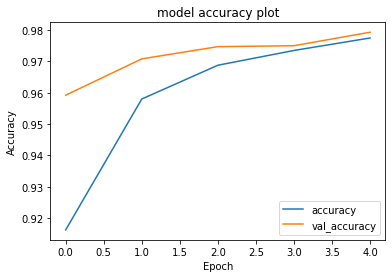

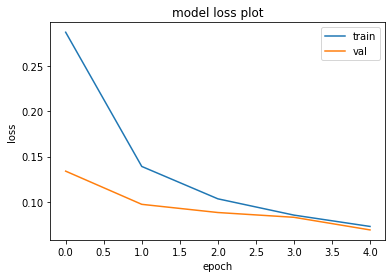

In [90]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

### Evaluate the model
There are many metrics that can be used to evaluate a model. We will focus on three metrics for this lab:
1. Model Loss and Accuracy
2. Model Size
3. Inference time

In [91]:
# Evaluate prediction accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part1_model.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 1s - loss: 0.0687 - accuracy: 0.9793 - 592ms/epoch - 2ms/step
313/313 [==============================] - 0s 1ms/step

Model Accuracy: 97.93000221252441 %
Model Size: 374924.00 bytes
Inference Time is 6.979539394378663e-05 s


### Excercies (2.5 points)


#### Question 1: 
Load the untrained model. Change the learning rate to 1.5, recompile and retrain the model and display the accuracy and loss plots. What do you observe? **(0.5 point)**

##### Loading the untrained model

In [92]:
# Recreate the exact same model, including its weights and the optimizer
new_model_q1 = tf.keras.models.load_model('part1_model.h5')

# Show the model architecture
new_model_q1.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 dense_77 (Dense)            (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_78 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


##### Compile and train the model with learning rate of 1.5


In [93]:
optimizer_q1 = tf.keras.optimizers.Adam(learning_rate=1.5)
new_model_q1.compile(optimizer=optimizer_q1,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_q1 = new_model_q1.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 10.0164 - accuracy: 0.1076 - val_loss: 2.4637 - val_accuracy: 0.0987
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.4601 - accuracy: 0.0997 - val_loss: 2.6888 - val_accuracy: 0.1015
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4593 - accuracy: 0.1025 - val_loss: 2.4085 - val_accuracy: 0.0972
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4948 - accuracy: 0.1002 - val_loss: 2.3498 - val_accuracy: 0.0983
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4764 - accuracy: 0.1005 - val_loss: 2.4325 - val_accuracy: 0.0892


##### Plot accuracy and loss graphs

> We can observe that the performance of the model of is drastically different from our previous model performance. The accuracy and loss plots shows that the learning rate of 1.5 is behaving worse than the learning rate of 0.001.



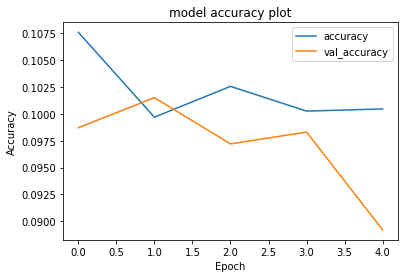

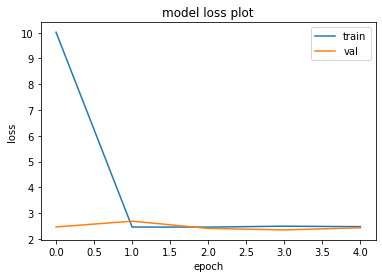

In [94]:
plt.plot(history_q1.history['accuracy'], label='accuracy')
plt.plot(history_q1.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history_q1.history['loss'])
plt.plot(history_q1.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

##### Evaluate the model

In [95]:
# Evaluate prediction accuracy
test_loss, test_acc = new_model_q1.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = new_model_q1.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part1_model.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 1s - loss: 2.4325 - accuracy: 0.0892 - 607ms/epoch - 2ms/step
313/313 [==============================] - 0s 1ms/step

Model Accuracy: 8.919999748468399 %
Model Size: 374924.00 bytes
Inference Time is 5.801088809967041e-05 s


##### Observation

Evaluating the model with learning rate of 1.5

1. Accuracy: The training accuracy has dropped significantly while comparing the previous model. It seems that the model did not learn all the features of the data, as the accuracy during training and validation is very low. The overal model accuracy has droped nearly less than 10%.

2. Loss: The Loss has increased significantly from the previous model to more than 200%. This shows us that the model is not predicting the numbers from the images correctly at all.

3. Model Size (its the same since we loaded the same saved model)

4. Inference time for the new model is slightly lower than the previous model because in this modell we make less number of updates (long jumps) which causes the model to take less time to to process new data and make a prediction.

5. The large learning rate is causing a divergent behaviour in our model.

These results make sense since the accuracy drops with increase in model loss. The large learning rate has allowed the model to learn faster, at the cost of arriving on a sub-optimal final set of weights. This results in bad weights leading to bad accuracy and performance. These results show us that the model has not performed well with a learning rate of 1.

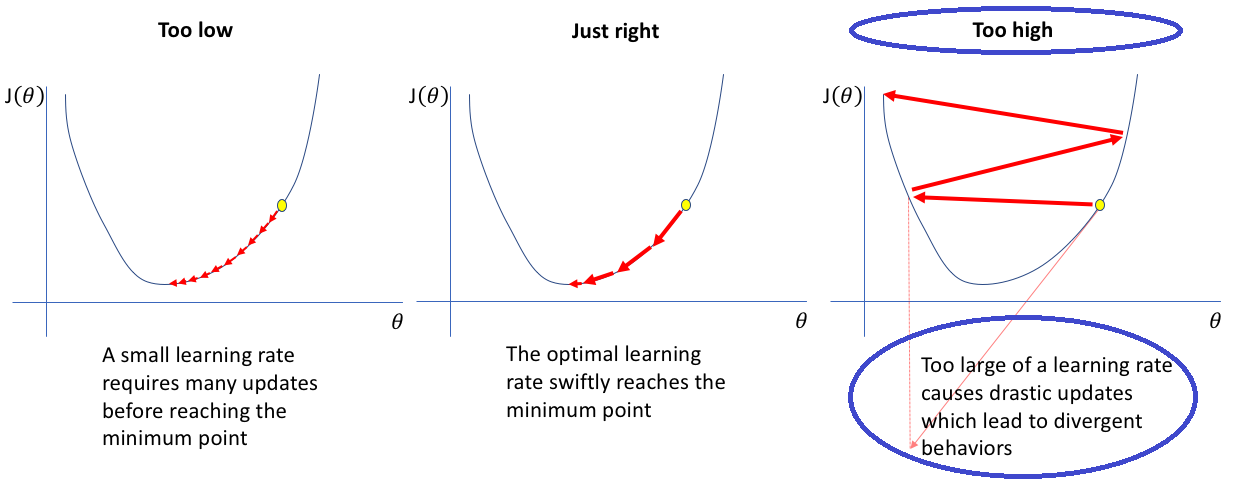

In [ ]:
# Evaluate prediction accuracy
test_loss_q1, test_acc_q1 = new_model_q1.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = new_model_q1.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc_q1*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part1_model.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 1s - loss: 2.3966 - accuracy: 0.0892 - 563ms/epoch - 2ms/step
313/313 [==============================] - 0s 1ms/step

Model Accuracy: 8.919999748468399 %
Model Size: 374881.00 bytes
Inference Time is 5.63936710357666e-05 s


#### Question 2: 
Load the untrained model. Change the learning rate to 0.0001, recompile and retrain the model and display the accuracy and loss plots. What do you observe? **(0.5 point)**

##### Loading the untrained model

In [106]:
# Recreate the exact same model, including its weights and the optimizer
new_model_q2 = tf.keras.models.load_model('part1_model.h5')

# Show the model architecture
new_model_q2.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 dense_77 (Dense)            (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_78 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


##### Compile and train the model with learning rate of 0.0001


In [107]:
optimizer_q2 = tf.keras.optimizers.Adam(learning_rate=0.0001)
new_model_q2.compile(optimizer=optimizer_q2,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_q2 = new_model_q2.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6759 - accuracy: 0.8205 - val_loss: 0.3224 - val_accuracy: 0.9133
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3259 - accuracy: 0.9100 - val_loss: 0.2492 - val_accuracy: 0.9303
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2644 - accuracy: 0.9253 - val_loss: 0.2077 - val_accuracy: 0.9405
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2268 - accuracy: 0.9355 - val_loss: 0.1834 - val_accuracy: 0.9479
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2002 - accuracy: 0.9423 - val_loss: 0.1651 - val_accuracy: 0.9530


##### Plot accuracy and loss graphs

> We can observe that the performance of the model of is drastically different from our previous model performance. The accuracy and loss plots shows that the learning rate of 0.0001 is behaving better than the learning rate of 0.001.

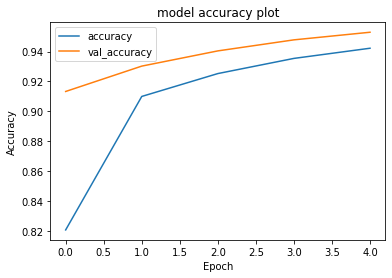

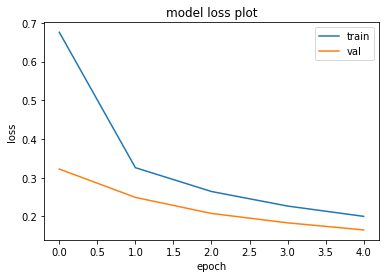

In [108]:
plt.plot(history_q2.history['accuracy'], label='accuracy')
plt.plot(history_q2.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history_q2.history['loss'])
plt.plot(history_q2.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

##### Evaluate the model

In [109]:
# Evaluate prediction accuracy
test_loss, test_acc = new_model_q2.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = new_model_q2.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part1_model.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 1s - loss: 0.1651 - accuracy: 0.9530 - 602ms/epoch - 2ms/step
313/313 [==============================] - 0s 1ms/step

Model Accuracy: 95.3000009059906 %
Model Size: 374924.00 bytes
Inference Time is 7.032530307769776e-05 s



##### Observation

Evaluating the model with learning rate of 0.0001

1. Accuracy: The training accuracy has dropped a little bit while comparing the previous model. It seems that the model did learn most the features of the data, as the accuracy during training and validation is very decent. The overal model accuracy is about 2-5 % lesser than the previous model on average.

2. Loss: The Loss increased slightly from the previous model. The overal loss seems to be higher than 0.25 for this model whereas our previous model had overall loss less than 0.25.

3. Model Size (its the same since we loaded the same saved model)

4. Inference time for the new model is slightly higher than the previous model because in this model we make more number of updates (smaller jumps) which causes the model to take more time to to process new data and make a prediction.

5. The small learning rate is causing a good behaviour in our model, maybe with more epochs we would have better results. But with the same epochs, the small learning rate has lower accuracy and slightly high loss compared to the previous model.

These results make sense since the accuracy drops with increase in model loss. The small learning rate has allowed the model to learn slowly, where each incremental step takes significant epoch time. This results in bad accuracy and performance for a set epoch. These results show us that the model has not performed well with a learning rate of 0.0001.

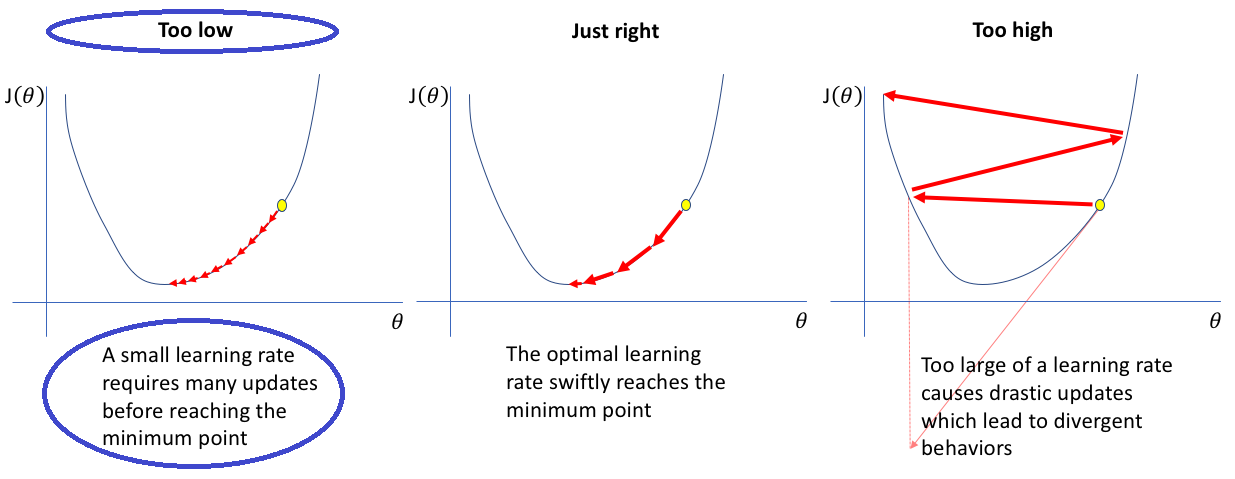

#### Question 3: 

Rebuild the model with 8 neurons in the first Dense layer instead of 128. Then recompile and retrain the model and save it. Finally compare the new size, accuracy and inference time to the original model. **(0.75 point)**

##### Build Machine Learning Model

In [110]:
model_q3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

##### Save and Load Model

In [111]:
# Save your model
model_q3.save('part1_q3_model.h5')

# Recreate the exact same model, including its weights and the optimizer
new_model_q3 = tf.keras.models.load_model('part1_q3_model.h5')

# Show the model architecture
new_model_q3.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_27 (Flatten)        (None, 784)               0         
                                                                 
 dense_79 (Dense)            (None, 8)                 6280      
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_80 (Dense)            (None, 10)                90        
                                                                 
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


##### Compile and train the model

In [112]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
new_model_q3.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_q3 = new_model_q3.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9651 - accuracy: 0.6676 - val_loss: 0.4621 - val_accuracy: 0.8865
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7173 - accuracy: 0.7561 - val_loss: 0.3972 - val_accuracy: 0.8977
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6734 - accuracy: 0.7704 - val_loss: 0.3749 - val_accuracy: 0.9020
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6515 - accuracy: 0.7791 - val_loss: 0.3647 - val_accuracy: 0.9061
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6446 - accuracy: 0.7806 - val_loss: 0.3528 - val_accuracy: 0.9066


##### Plot accuracy and loss graphs

> We can observe that the performance of the model of is drastically different from our previous model performance. The accuracy and loss plots shows that the learning rate of 0.0001 is behaving better than the learning rate of 0.001.

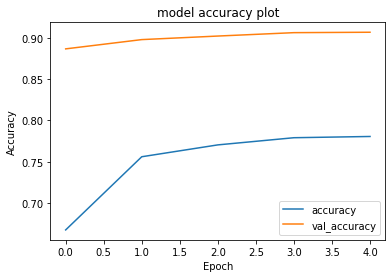

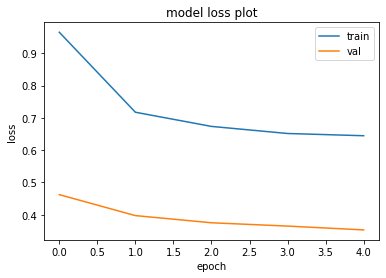

In [113]:
plt.plot(history_q3.history['accuracy'], label='accuracy')
plt.plot(history_q3.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history_q3.history['loss'])
plt.plot(history_q3.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

##### Evaluate the model

In [114]:
# Evaluate prediction accuracy
test_loss, test_acc = new_model_q3.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = new_model_q3.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part1_q3_model.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 1s - loss: 0.3528 - accuracy: 0.9066 - 604ms/epoch - 2ms/step
313/313 [==============================] - 0s 1ms/step

Model Accuracy: 90.65999984741211 %
Model Size: 25283.00 bytes
Inference Time is 7.054646015167237e-05 s


##### Comparison 

| Comparison| New model | Old model | Comments |
|       --- |       --- |       --- |      --- |
|Size| 25283 bytes| 374924 bytes| New model is smaller|
|Accuracy| 90.65 %| 97.93 %| Old model is more accurate|
|Inference time| 7.05 E-5 Sec| 6.97 E-5 Sec| Both models are comparable in inference time|


Observations:
1. Validation losses is lower the the train loss. The train loss is almost double the validation loss consistently over consequtive epoch.
2. Training accuracy is consistently lower than the validation loss (Potential underfitting model).
3. Overall, there are is minimal improvements/changes over each succeeding epoch for the new model.

The model performence is lower than the original model. The model looks like it has been **under fitted**, where the model is struglling to the learn features of the dataset. The main reason for this to happen is because we trained with a lower number of neurons.

#### Question 4: 
Rebuild the model with 2048 neurons in the first Dense layer instead of 128. Then recompile and retrain the model and save it. Finally compare the new size, accuracy and inference time to the original model. **(0.75 point)**

##### Build Machine Learning Model

In [115]:
model_q4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(2048, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

##### Save and Load Model

In [117]:
# Save your model
model_q4.save('part1_q4_model.h5')

# Recreate the exact same model, including its weights and the optimizer
new_model_q4 = tf.keras.models.load_model('part1_q4_model.h5')

# Show the model architecture
new_model_q4.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_28 (Flatten)        (None, 784)               0         
                                                                 
 dense_81 (Dense)            (None, 2048)              1607680   
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_82 (Dense)            (None, 10)                20490     
                                                                 
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


##### Compile and train the model

In [118]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
new_model_q4.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_q4 = new_model_q4.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1911 - accuracy: 0.9425 - val_loss: 0.1089 - val_accuracy: 0.9644
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0889 - accuracy: 0.9719 - val_loss: 0.0839 - val_accuracy: 0.9745
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0622 - accuracy: 0.9801 - val_loss: 0.0860 - val_accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0492 - accuracy: 0.9847 - val_loss: 0.0727 - val_accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0412 - accuracy: 0.9869 - val_loss: 0.0876 - val_accuracy: 0.9774


##### Plot accuracy and loss graphs

> We can observe that the performance of the model of is drastically different from our previous model performance. The accuracy and loss plots shows that the learning rate of 0.0001 is behaving better than the learning rate of 0.001.

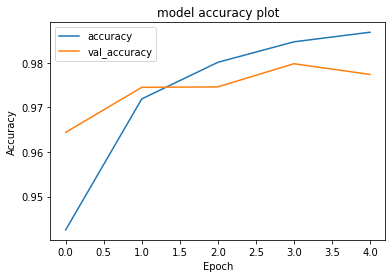

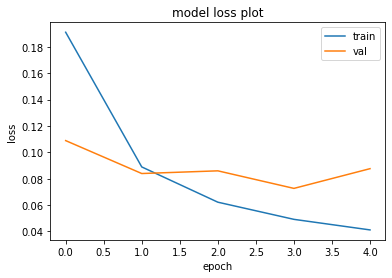

In [119]:
plt.plot(history_q4.history['accuracy'], label='accuracy')
plt.plot(history_q4.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history_q4.history['loss'])
plt.plot(history_q4.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

##### Evaluate the model

In [121]:
# Evaluate prediction accuracy
test_loss, test_acc = new_model_q4.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = new_model_q4.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part1_q4_model.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 1s - loss: 0.0876 - accuracy: 0.9774 - 1s/epoch - 4ms/step
313/313 [==============================] - 1s 2ms/step

Model Accuracy: 97.7400004863739 %
Model Size: 6005569.00 bytes
Inference Time is 9.352307319641114e-05 s


##### Comparison 

| Comparison| New model | Old model | Comments |
|       --- |       --- |       --- |      --- |
|Size| 6005569 bytes| 374924 bytes| New model is larger|
|Accuracy| 97.74 %| 97.93 %| Both models have comparable accuracy|
|Inference time| 9.35 E-5 Sec| 6.97 E-5 Sec| New model takes more time|

Observations:
1. Validation losses is higher the the train loss (potential overffiting model).
2. Training accuracy higher than validatuion accuracy (potential overffiting model).
3. The new model has a larger size because of the large number of neurons.
4. MOre number of neurons also means more time to train them, which is evident in the higher inference time.

The model performence is lower than the original model. The model looks like it has been **over fitted**, where the model is almost learning all the in-depth features of the dataset (memorizing). This makes the model to get wrong predictions in the validation dataset. The main reason for this to happen is because we trained with a higher number of neurons, which is trying to fully connect all the layers with the dataset.

# **Part 2**: Convlutional Neural Netowrks Using TensorFlow

### Introduction:

Convolutional Neural Networks (CNN) are distinguished by their ability to identify patterns and features in images (e.g. edges, lines, circles or even objects). CNN's are widely adopted in computer vision applications and found success in audio signals and text. 


A typical Convolutional neural network is composed mainly of three types of layers:

* **Convolutional layer:** The core building block of a CNN, which consists of Filters or kernels to detect features. Generally, the first convolutional layers detect simple features (e.g. edges) and later layers identify objects. 
* **Pooling layer:** Reduces the spatial size of the feature maps so having fewer learnable weights and less computation cost.
* **Fully-connected layer:**  Known as the output layer, where the last identified feature maps are flattened and connected to dense layers for the classification task.



### Import TensorFlow and Other Required Modules

In [4]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time
import tempfile

### Download and prepare the MNIST dataset
Similar to Part 1, loading the MNIST dataset and performing normalization to improve the training performance and speed.

In [5]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


### Build Machine Learning Model
In this part, we will build the LeNet-5 CNN model, one of the earliest CNN architectures proposed by Yann LeCun and others for recognizing handwritten and machine-printed characters.

The LeNet-5 architecture cosisits of 2 convolutional layers, 2 pooling layers and fully connected layers as shown in the figure below.

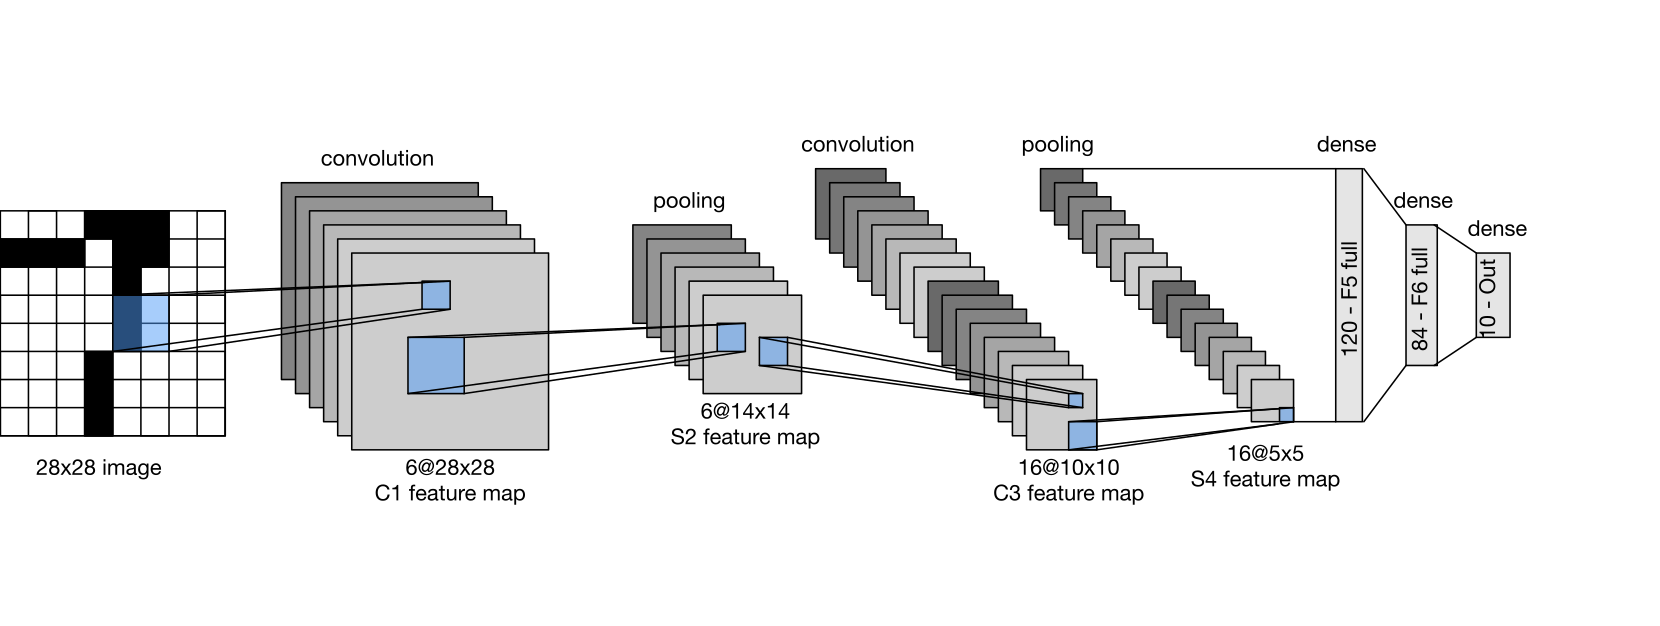

[Image Source](https://d2l.ai/chapter_convolutional-neural-networks/lenet.html#img-lenet)

In [6]:
lenet_5_model = models.Sequential()
# Convolutional layer1: cosits of 6 filters, filter size 5x5 and stride of 1
lenet_5_model.add( layers.Conv2D(filters = 6, kernel_size = (5,5),strides=1, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
#Pooling layer 1
lenet_5_model.add(layers.AveragePooling2D(pool_size = (2,2)))
# Convolutional layer2: cosits of 16 filters, filter size 5x5 and stride of 1
lenet_5_model.add(layers.Conv2D(filters = 16, kernel_size = 5,strides=1, activation = 'relu'))
#Pooling layer 2 
lenet_5_model.add(layers.AveragePooling2D(pool_size = (2,2)))

#Output layer( Fully connected layers)
lenet_5_model.add(layers.Flatten())
lenet_5_model.add(layers.Dense(120, activation='relu'))
lenet_5_model.add(layers.Dense(84, activation='relu'))
lenet_5_model.add(layers.Dense(10, activation='softmax'))

# Save your model
lenet_5_model.save('part2_model.h5')


lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

### Compile and train the model


In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
lenet_5_model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = lenet_5_model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 15s 3ms/step - loss: 0.2264 - accuracy: 0.9321 - val_loss: 0.0795 - val_accuracy: 0.9747
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0705 - accuracy: 0.9789 - val_loss: 0.0484 - val_accuracy: 0.9841
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0510 - accuracy: 0.9841 - val_loss: 0.0431 - val_accuracy: 0.9854
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0393 - accuracy: 0.9877 - val_loss: 0.0364 - val_accuracy: 0.9878
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0332 - accuracy: 0.9894 - val_loss: 0.0312 - val_accuracy: 0.9897


### Plot accuracy and loss graphs

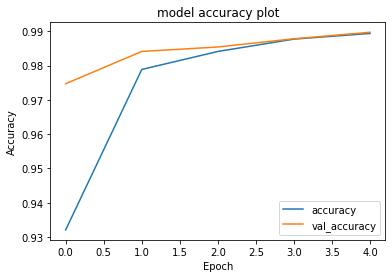

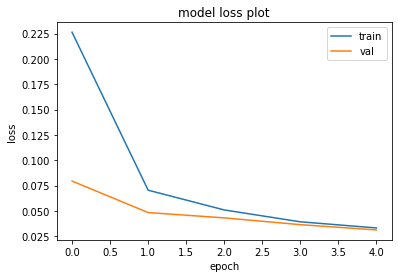

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

### Evaluate the model
Applying the same evaluation metrics in part 1 to evaluate the trained CNN model:

1. Model Loss and Accuracy
2. Model Size
3. Inference time

In [9]:
# Evaluate prediction accuracy
test_loss, test_acc = lenet_5_model.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = lenet_5_model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part2_model.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 1s - loss: 0.0312 - accuracy: 0.9897 - 660ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step

Model Accuracy: 98.97000193595886 %
Model Size: 228338.00 bytes
Inference Time is 7.598767280578613e-05 s


## Excercises: (2.5 points)
---




 



### Q1: 

Briefly compare the Fully connected (FC) model in part 1 and the CNN model in part 2 in terms of the model size, accuracy and inference time.**(0.5 point)**

#### Comparison 

Comparing the new size, accuracy and inference time to the original model.

The model performence is much lower than the original model. The accuracy has dropped nearly 10X times. The main reason for this to happen is because we trained with lower number of neurons.

### Q2: 

Modify the two convolutional layers of the LeNet-5 stride value into 2 and discuss the effect on the model size and accuracy. If the perfromance is affected, explain the reason? **(0.5 point)**

#### Build Machine Learning Model with stride of 2

In [ ]:
lenet_5_model = models.Sequential()
# Convolutional layer1: cosits of 6 filters, filter size 5x5 and stride of 2
lenet_5_model.add(layers.Conv2D(filters = 6, kernel_size = (5,5),strides=2, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
#Pooling layer 1
lenet_5_model.add(layers.AveragePooling2D(pool_size = (2,2)))
# Convolutional layer2: cosits of 16 filters, filter size 5x5 and stride of 2
lenet_5_model.add(layers.Conv2D(filters = 16, kernel_size = 5,strides=2, activation = 'relu'))
#Pooling layer 2 
lenet_5_model.add(layers.AveragePooling2D(pool_size = (2,2)))

#Output layer( Fully connected layers)
lenet_5_model.add(layers.Flatten())
lenet_5_model.add(layers.Dense(120, activation='relu'))
lenet_5_model.add(layers.Dense(84, activation='relu'))
lenet_5_model.add(layers.Dense(10, activation='softmax'))

# Save your model
lenet_5_model.save('part2_model.h5')


lenet_5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 7, 7, 6)          0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 16)          2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 1, 1, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_5 (Flatten)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 120)              

#### Compile and train the model

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
lenet_5_model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = lenet_5_model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5075 - accuracy: 0.8387 - val_loss: 0.2080 - val_accuracy: 0.9373
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1809 - accuracy: 0.9463 - val_loss: 0.1564 - val_accuracy: 0.9538
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1369 - accuracy: 0.9578 - val_loss: 0.1204 - val_accuracy: 0.9629
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1143 - accuracy: 0.9645 - val_loss: 0.0914 - val_accuracy: 0.9711
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0994 - accuracy: 0.9693 - val_loss: 0.0926 - val_accuracy: 0.9721


#### Plot accuracy and loss graphs

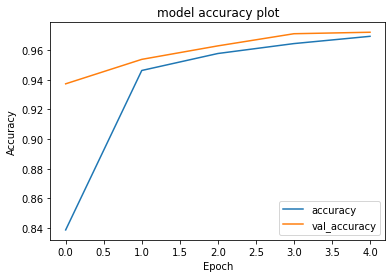

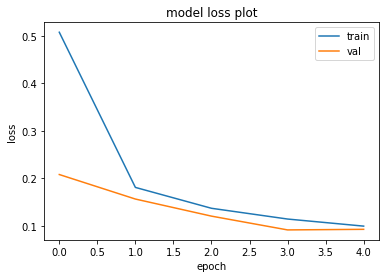

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

#### Evaluate the model
Applying the same evaluation metrics in part 1 to evaluate the trained CNN model:

1. Model Loss and Accuracy
2. Model Size
3. Inference time

In [ ]:
# Evaluate prediction accuracy
test_loss, test_acc = lenet_5_model.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = lenet_5_model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part2_model.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 1s - loss: 0.0926 - accuracy: 0.9721 - 612ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step

Model Accuracy: 97.2100019454956 %
Model Size: 59946.00 bytes
Inference Time is 6.549246311187744e-05 s


### Q3: 
Replace the average-pooling layer with a max-pooling layer for the LeNet-5 CNN model and discuss the effect on the trained model size and accuracy.**(0.5 point)**


#### Build Machine Learning Model

In [ ]:
lenet_5_model_q3 = models.Sequential()
# Convolutional layer1: cosits of 6 filters, filter size 5x5 and stride of 2
lenet_5_model_q3.add(layers.Conv2D(filters = 6, kernel_size = (5,5),strides=2, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
#Pooling layer 1
lenet_5_model_q3.add(layers.MaxPooling2D(pool_size = (2,2)))
# Convolutional layer2: cosits of 16 filters, filter size 5x5 and stride of 2
lenet_5_model_q3.add(layers.Conv2D(filters = 16, kernel_size = 5,strides=2, activation = 'relu'))
#Pooling layer 2 
lenet_5_model_q3.add(layers.MaxPooling2D(pool_size = (2,2)))

#Output layer( Fully connected layers)
lenet_5_model_q3.add(layers.Flatten())
lenet_5_model_q3.add(layers.Dense(120, activation='relu'))
lenet_5_model_q3.add(layers.Dense(84, activation='relu'))
lenet_5_model_q3.add(layers.Dense(10, activation='softmax'))

# Save your model
lenet_5_model_q3.save('part2_model_q3.h5')


lenet_5_model_q3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 14, 14, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 6)          0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 16)          2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 16)         0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 16)                0         
                                                                 
 dense_23 (Dense)            (None, 120)              

#### Compile and train the model

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
lenet_5_model_q3.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_q3 = lenet_5_model_q3.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 7s 3ms/step - loss: 0.3628 - accuracy: 0.8881 - val_loss: 0.1527 - val_accuracy: 0.9545
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1393 - accuracy: 0.9575 - val_loss: 0.1168 - val_accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1025 - accuracy: 0.9685 - val_loss: 0.0924 - val_accuracy: 0.9719
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0869 - accuracy: 0.9731 - val_loss: 0.0953 - val_accuracy: 0.9719
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0767 - accuracy: 0.9753 - val_loss: 0.0887 - val_accuracy: 0.9718


#### Plot accuracy and loss graphs

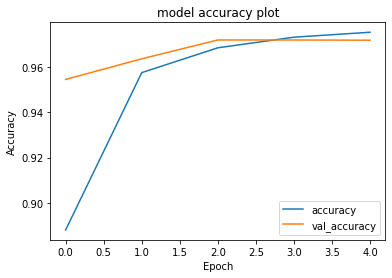

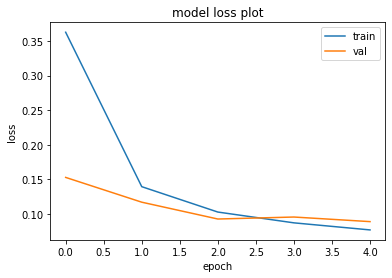

In [ ]:
plt.plot(history_q3.history['accuracy'], label='accuracy')
plt.plot(history_q3.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history_q3.history['loss'])
plt.plot(history_q3.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

#### Evaluate the model
Applying the same evaluation metrics in part 1 to evaluate the trained CNN model:

1. Model Loss and Accuracy
2. Model Size
3. Inference time

In [ ]:
# Evaluate prediction accuracy
test_loss, test_acc = lenet_5_model_q3.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = lenet_5_model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part2_model.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 1s - loss: 0.0887 - accuracy: 0.9718 - 861ms/epoch - 3ms/step
313/313 [==============================] - 0s 2ms/step

Model Accuracy: 97.18000292778015 %
Model Size: 59966.00 bytes
Inference Time is 5.8647012710571286e-05 s


### Q4:

IoT devices are limited in storage and computation resources. Therefore lightweight machine-learning or compressed models are ideal for IoT edge devices. 

In this exercise, you will modify the LeNet-5 CNN model on the MNIST dataset to reduce its size as much as possible (expecting less than 13k parameters) while maintaining inference accuracy equal to or above 95%. There is no limitation to the applied modifications. You may modify the number of filters, filter size, stride value, fully connected layers etc.**(1 point)**


#### Build Machine Learning Model

In [67]:
lenet_5_model_q4 = models.Sequential()
# Convolutional layer1: consits of 6 filters, filter size 5x5 and stride of 2
lenet_5_model_q4.add(layers.Conv2D(filters = 6, kernel_size = (5,5),strides=(2,2), padding = 'same', activation = 'relu', input_shape = (28,28,1)))
#Pooling layer 1
lenet_5_model_q4.add(layers.MaxPooling2D(pool_size = (2,2)))
# Convolutional layer2: consits of 16 filters, filter size 5x5 and stride of 2
lenet_5_model_q4.add(layers.Conv2D(filters = 16, kernel_size = 5,strides=2, activation = 'relu'))
#Pooling layer 2 
lenet_5_model_q4.add(layers.MaxPooling2D(pool_size = (2,2)))

#Output layer( Fully connected layers)
lenet_5_model_q4.add(layers.Flatten())
lenet_5_model_q4.add(layers.Dense(30, activation='relu'))
lenet_5_model_q4.add(layers.Dense(10, activation='relu'))
lenet_5_model_q4.add(layers.Dense(10, activation='softmax'))

# Save your model
lenet_5_model_q4.save('part2_model_q4.h5')


lenet_5_model_q4.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 14, 14, 6)         156       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 7, 7, 6)          0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 2, 2, 16)          2416      
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 1, 1, 16)         0         
 g2D)                                                            
                                                                 
 flatten_24 (Flatten)        (None, 16)                0         
                                                                 
 dense_72 (Dense)            (None, 30)              

#### Compile and train the model

In [68]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
lenet_5_model_q4.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_q4 = lenet_5_model_q4.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5540 - accuracy: 0.8213 - val_loss: 0.2147 - val_accuracy: 0.9335
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1895 - accuracy: 0.9444 - val_loss: 0.1401 - val_accuracy: 0.9573
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1420 - accuracy: 0.9580 - val_loss: 0.1132 - val_accuracy: 0.9662
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1196 - accuracy: 0.9641 - val_loss: 0.1199 - val_accuracy: 0.9631
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1086 - accuracy: 0.9671 - val_loss: 0.1036 - val_accuracy: 0.9669


#### Plot accuracy and loss graphs

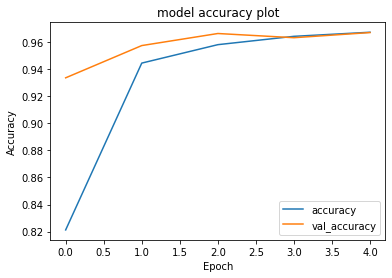

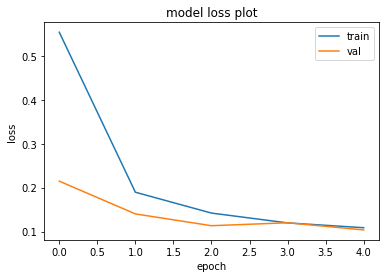

In [69]:
plt.plot(history_q4.history['accuracy'], label='accuracy')
plt.plot(history_q4.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history_q4.history['loss'])
plt.plot(history_q4.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

#### Evaluate the model
Applying the same evaluation metrics in part 1 to evaluate the trained CNN model:

1. Model Loss and Accuracy
2. Model Size
3. Inference time

In [70]:
# Evaluate prediction accuracy
test_loss, test_acc = lenet_5_model_q4.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = lenet_5_model_q4.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part2_model_q4.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 1s - loss: 0.1036 - accuracy: 0.9669 - 660ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step

Model Accuracy: 96.68999910354614 %
Model Size: 15399.00 bytes
Inference Time is 7.299787998199463e-05 s
